# Seaborn Data Visualization

### What is Seaborn

Data Visualization library similar to Matplot lib but with better graphics, granularity and easier to use

### How do we use Seaborn?

###### Installation and Setup

`pip install seaborn`

`import seaborn as sns`

Fun fact, if you've ever watched the show The West Wing, `sns` is short for Sam Norman Seaborn (character on the show The West Wing)

### Drawing our first plots (basic)

Seaborn comes with multiple data sets

- https://github.com/mwaskom/seaborn-data


Load Dataset

`df = sns.load_dataset('taxis')`

###### Styling

Global styling for all plots

Theme/Style

`sns.set_style('darkgrid')`

Remove Ticks

`sns.despine(left=True, bottom=True)`

Default Figure Size

`plt.figure(figsize=(width,height))`

Pre-defined Styles

`sns.set_context('poster', font_scale=2)`

Colors and Palettes

`sns.set_palette('tab10')`


###### Historgram
`sns.histplot(df['total'], bins=20)`

###### JointPlot
Histogram with a scatter pattern

`sns.jointplot(x='total', y='tip', data=tips)`

###### PairPlot
Does a plot for all numeric value comparisons

`sns.pairplot(df)`


###### Bar Plot
Default is mean function from numpy

This can be changed to any other numpy mathematical function

For counting, use count_nonzero or use a countplot

`sns.barplot(x='payment', y='total', data=df, estimator=np.mean)`


###### CountPlot

`sns.countplot(x='payment', data=df)`

###### Box Plot

`sns.boxplot(x='pickup_borough', y='total', data=df)`

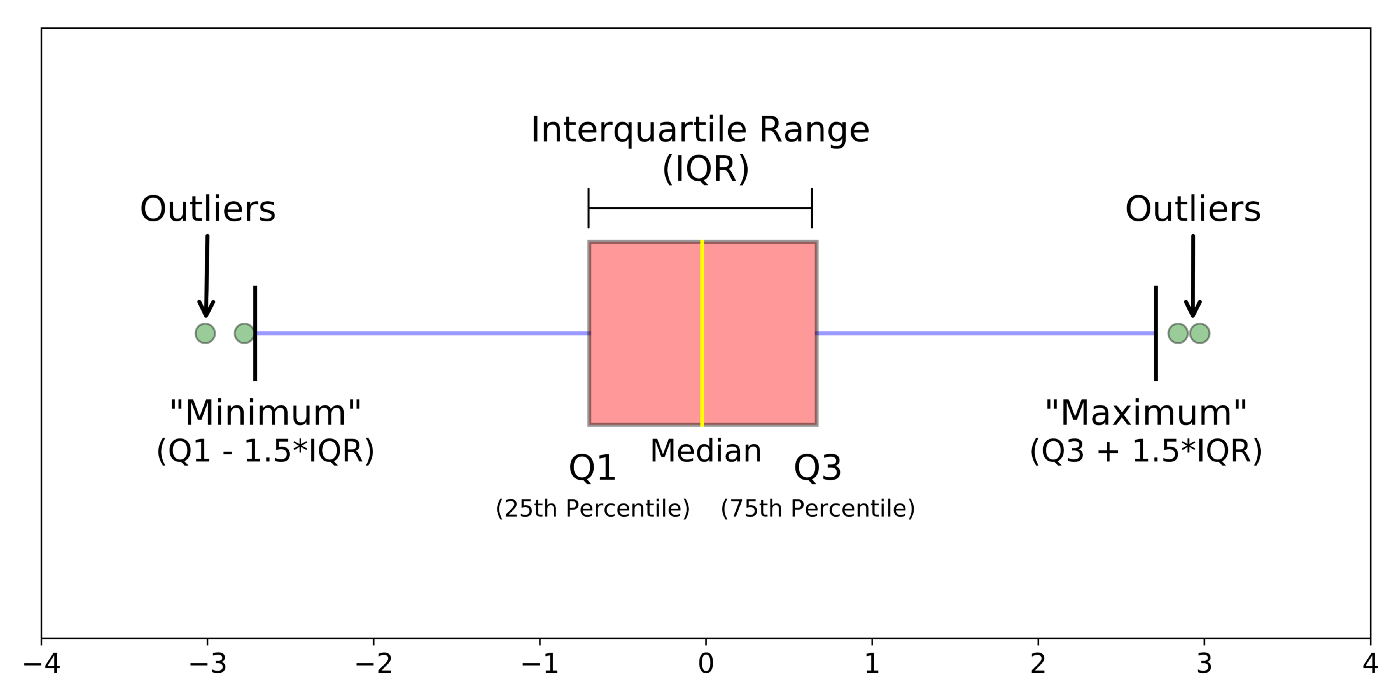


###### Violin Plot
Similar to a Box plot but with added KDE

`sns.violinplot(x='pickup_borough', y='total', data=df)`

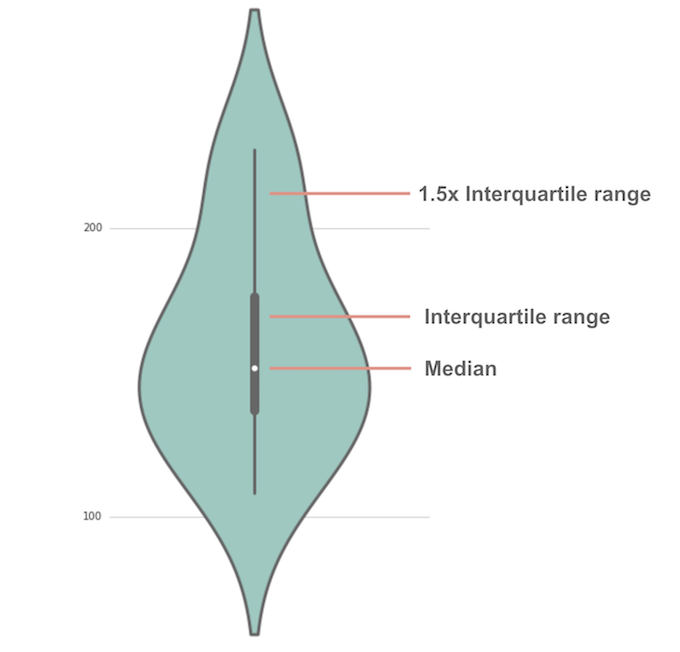

###### StripPlot
Vertical Scatter Plot

`sns.stripplot(x='pickup_borough', y='total', data=df, jitter=True, dodge=True, hue='payment')`

###### Swarm Plot
KDE with Scatter Plot

Does take a long time to run

Can stack swarm plots with Violin Plots

`sns.swarmplot(x='pickup_borough', y='total', data=df)`

###### CatPlot
Base form of all the plots but uses `kind` to specify the actual plot

`sns.catplot(x='pickup_borough', y='total', data=df, kind='box')`

###### Linear Model Plots (LMPlot)
Scatter Plot with a Linear Regression Line indicating correlation

`sns.lmplot(x='fare', y='tip', data=df)`


###### Adding Non-Numeric Categorical Data to a plot

Can also add a `hue` to compare categorical values within the graphs

`sns.pairplot(df, hue='payment')`


###### Changing Sizes of plots

Seaborn is hard to work with to adjust plot sizes and it depends on the plot and what parameters it accepts

Accepts the `ax` parameter

`
fig, axes = plt.subplots(figsize=(12,8))
sns.boxplot(ax=axes, rest_of_your_arguments)
`

Otherwise we have to look at each plot to find out what is accepted

`sns.catplot(height=8, aspect=2, rest_of_your_arguments)`

### Advanced Plots

###### Heatmap

Requires data to be tranformed into a matrix or correlated data

Basic correlation

`
tc = df.corr()
sns.heatmap(tc)
`

OR

Pivot Table

`
piv_tbl=df.pivot_table(index='pickup_borough',columns='dropoff_borough',values='fare')
sns.heatmap(piv_tbl, annot=True)
`

###### Cluster Map
Group points based on similarities, can't have Nan Values

`sns.clustermap(piv_tbl.drop('Staten Island', axis=1), cmap='coolwarm')`

###### Pair Grid
Customize the pairplot with specific types of plots

`
g = sns.PairGrid(df)
g.map(plt.scatter) # All plots will be scatter
g.map_diag(sns.histplot) # only diagonals will be histplot
g.map_upper(plt.scatter) # only the upper section will be scatter
g.map_lower(sns.kdeplot) # only the lower section will be kdeplots
`



In [197]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [200]:
# Seaborn comes with Sample Data already

df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


yellow    5451
green      982
Name: color, dtype: int64


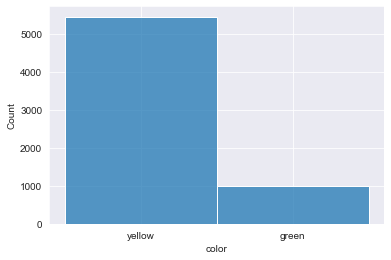

In [215]:
sns.set_style('darkgrid')
sns.set_palette('tab10')
sns.histplot(df['color'], bins=10)
print(df['color'].value_counts())

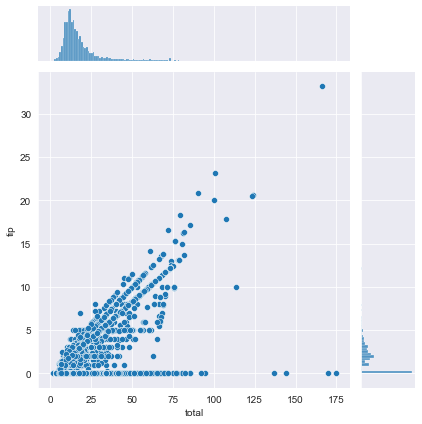

In [216]:
sns.jointplot(x='total', y='tip', data=tips)

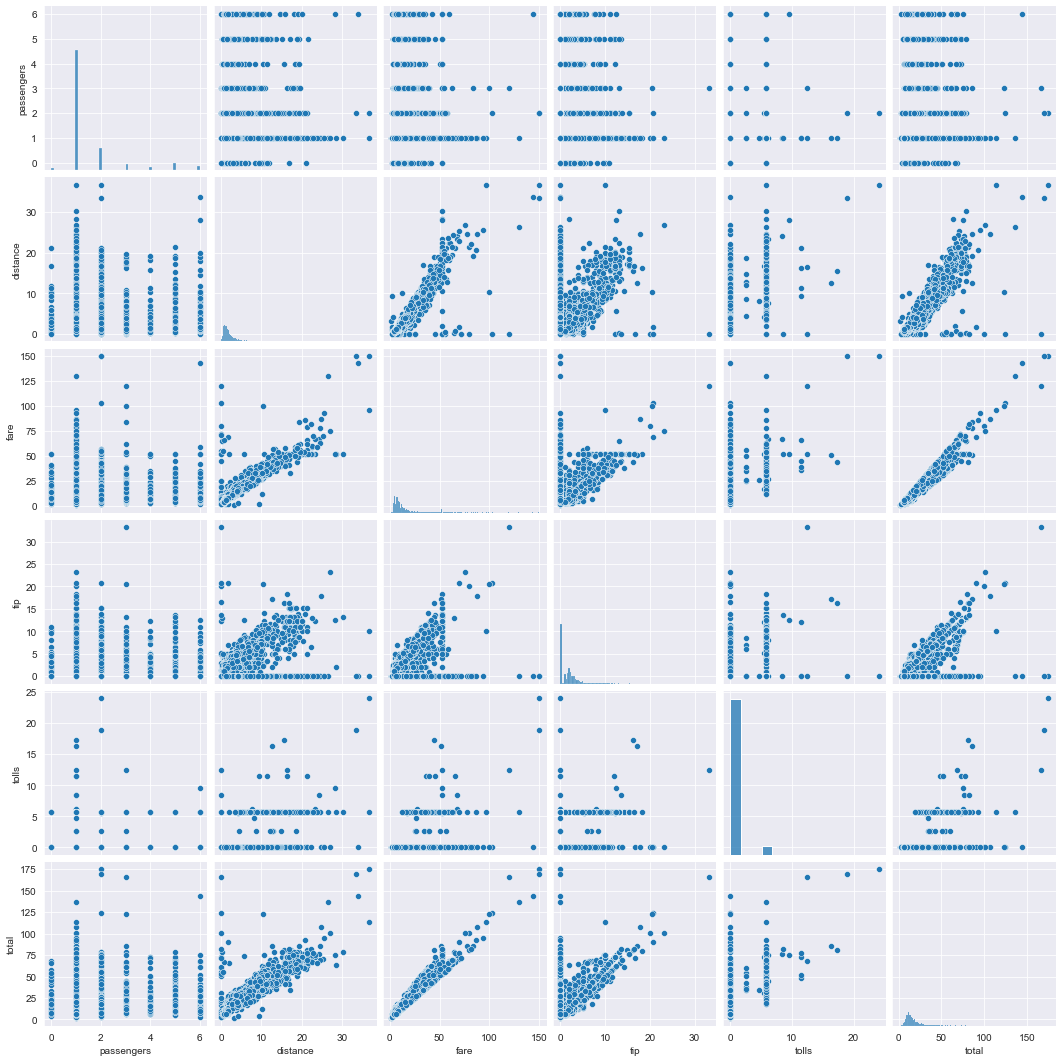

In [217]:
# Pair Plot is the most informative and most helpful in selecting the right Machine Learning algorithm

sns.pairplot(df)

<AxesSubplot:xlabel='payment', ylabel='total'>

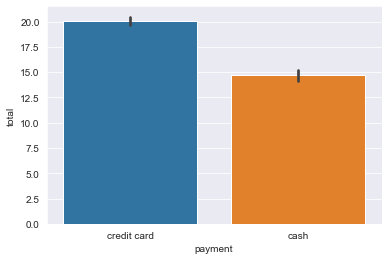

In [227]:
# Bar Plot

sns.barplot(x='payment', y='total', data=df, estimator=np.mean)

<AxesSubplot:xlabel='payment', ylabel='count'>

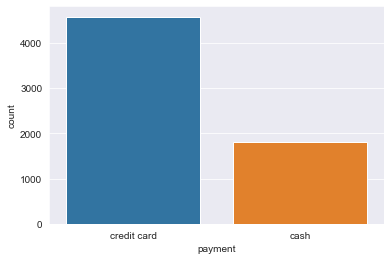

In [226]:
# Count Plot

sns.countplot(x='payment', data=df)



<AxesSubplot:xlabel='pickup_borough', ylabel='total'>

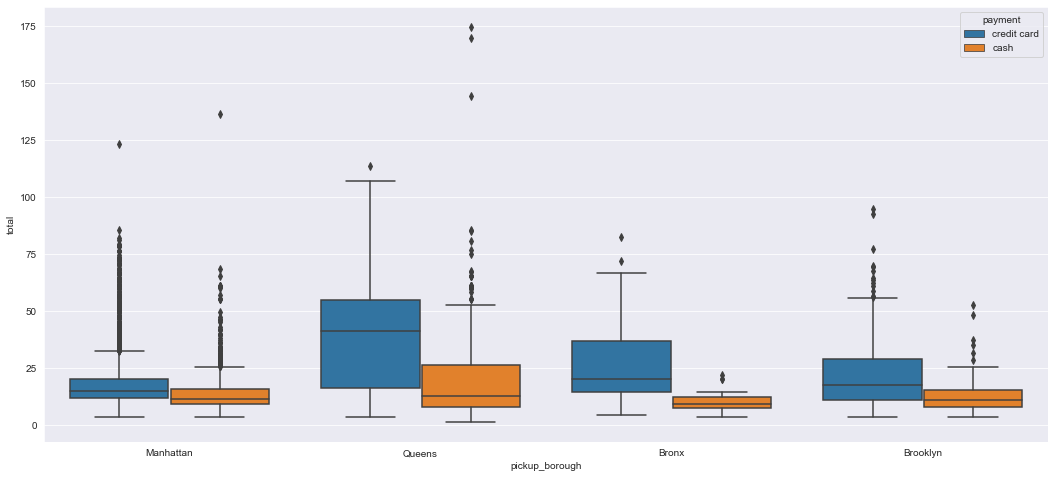

In [247]:
# Box Plots


fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot(x='pickup_borough', y='total', data=df, ax=ax, hue='payment')

In [231]:
df['pickup_borough'].value_counts()

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

<AxesSubplot:xlabel='pickup_borough', ylabel='total'>

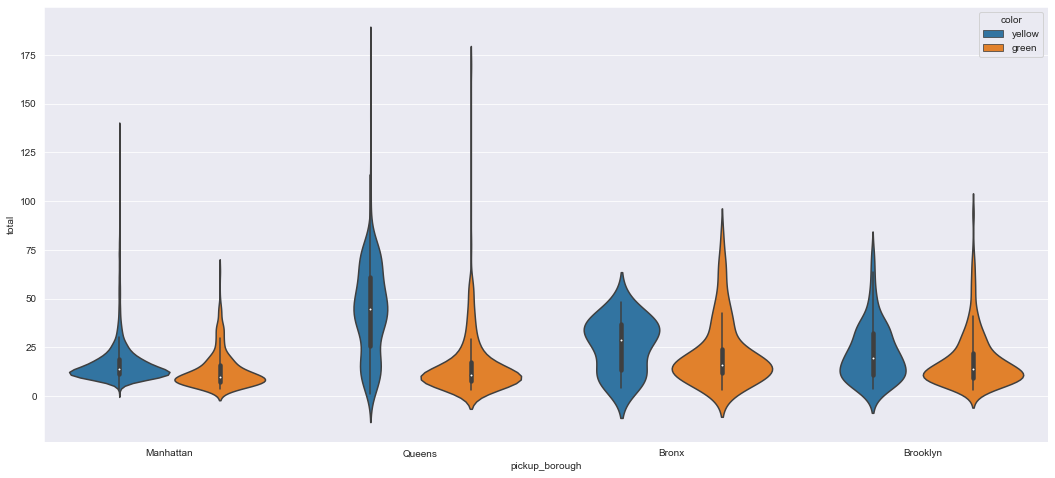

In [235]:
fig, ax = plt.subplots(figsize=(18,8))
sns.violinplot(x='pickup_borough', y='total', data=df, ax=ax, hue='color')

/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='pickup_borough', ylabel='total'>

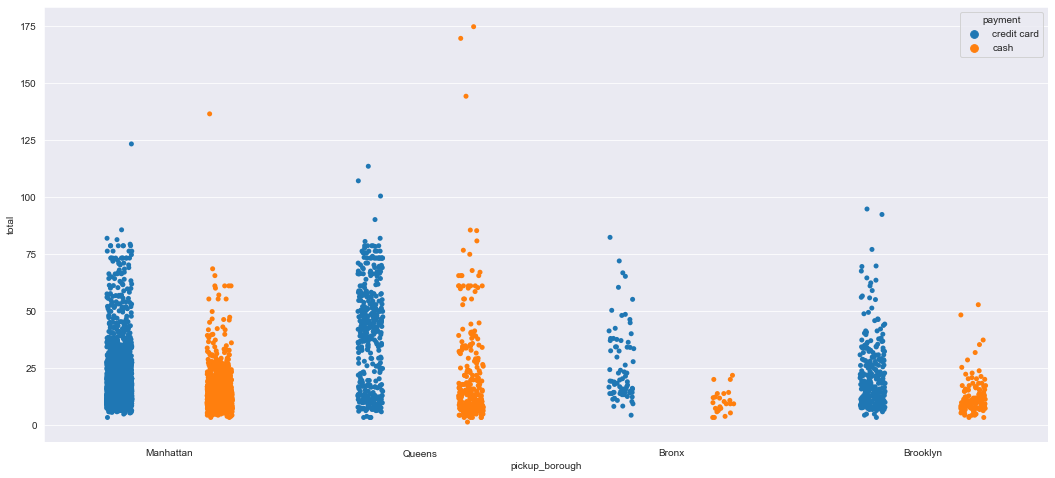

In [238]:
fig, ax = plt.subplots(figsize=(18,8))
sns.stripplot(x='pickup_borough', y='total', data=df, ax=ax, hue='payment', split='True')

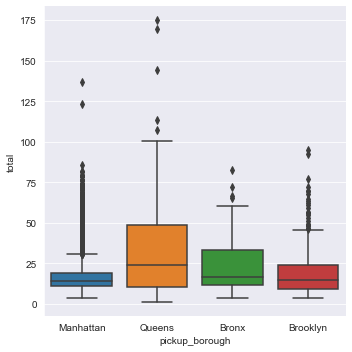

In [244]:
# Generic Plot base for all plots, optional
# If I don't want to remember the syntax for all the plots I can use the catplot
# Just change the kind variable to the specific type of plot desired


sns.catplot(x='pickup_borough', y='total', data=df, kind='box')

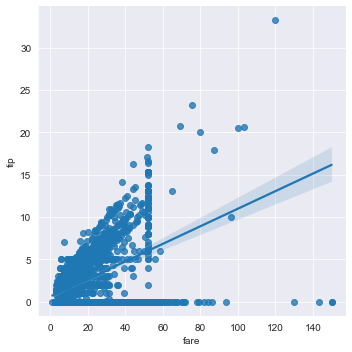

In [245]:
# LM Plot - Linear Model Plot

sns.lmplot(x='fare', y='tip', data=df)

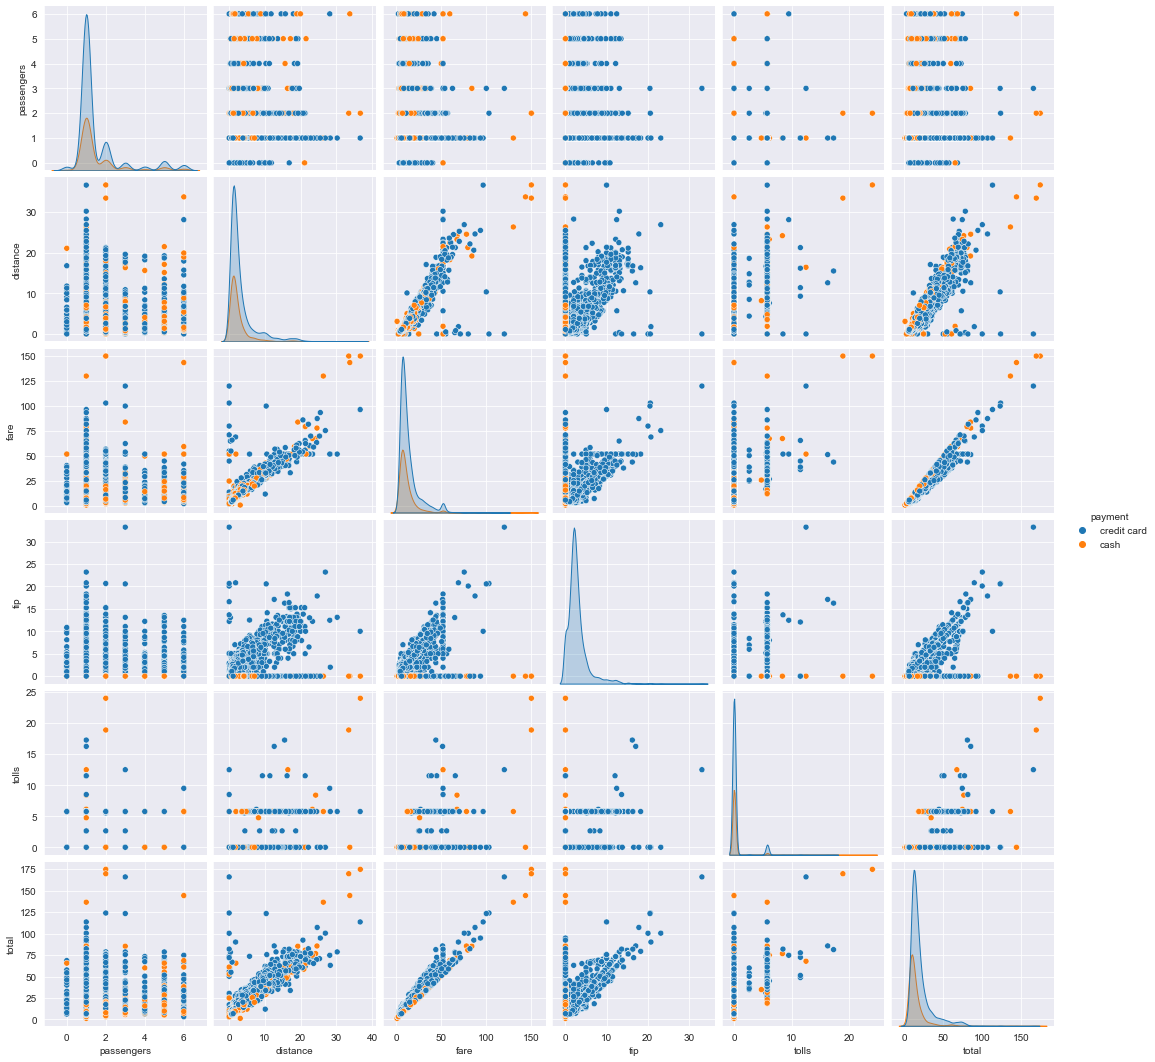

In [246]:
# Hue is a category column not a numerical column
# We want to use Hue only when we have 2 or 3 or maximum 4 values in a column

sns.pairplot(df, hue='payment')

In [248]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


            passengers  distance      fare       tip     tolls     total
passengers    1.000000  0.009411  0.007637  0.021099 -0.002903  0.015708
distance      0.009411  1.000000  0.920108  0.452589  0.635267  0.904676
fare          0.007637  0.920108  1.000000  0.488612  0.609307  0.974358
tip           0.021099  0.452589  0.488612  1.000000  0.413619  0.646186
tolls        -0.002903  0.635267  0.609307  0.413619  1.000000  0.683142
total         0.015708  0.904676  0.974358  0.646186  0.683142  1.000000


<AxesSubplot:>

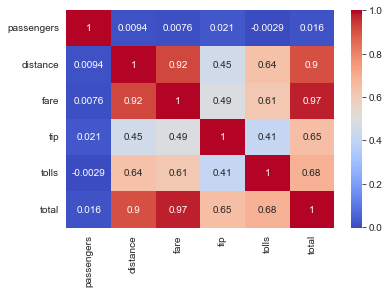

In [255]:
# Heatmaps - need a comparative or correlated data set - think pivot table or group by

# Correlation

print(df.corr())

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

dropoff_borough      Bronx   Brooklyn  Manhattan     Queens  Staten Island
pickup_borough                                                            
Bronx            15.648485  59.032500  31.942400  46.567500            NaN
Brooklyn         64.824000  13.701454  31.483881  37.224231            NaN
Manhattan        27.082364  32.164183  14.945734  47.355337         76.865
Queens           53.417273  42.351774  51.056518  14.973610            NaN


<AxesSubplot:xlabel='dropoff_borough', ylabel='pickup_borough'>

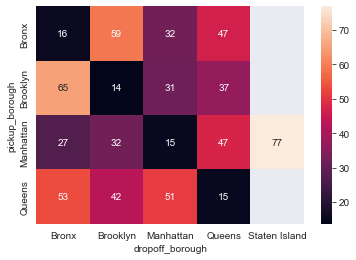

In [261]:
# Custom pivot table for our own correlation and comparions
df.head()

piv_tbl = df.pivot_table(index='pickup_borough',columns='dropoff_borough',values='total')

print(piv_tbl)
sns.heatmap(piv_tbl, annot=True)


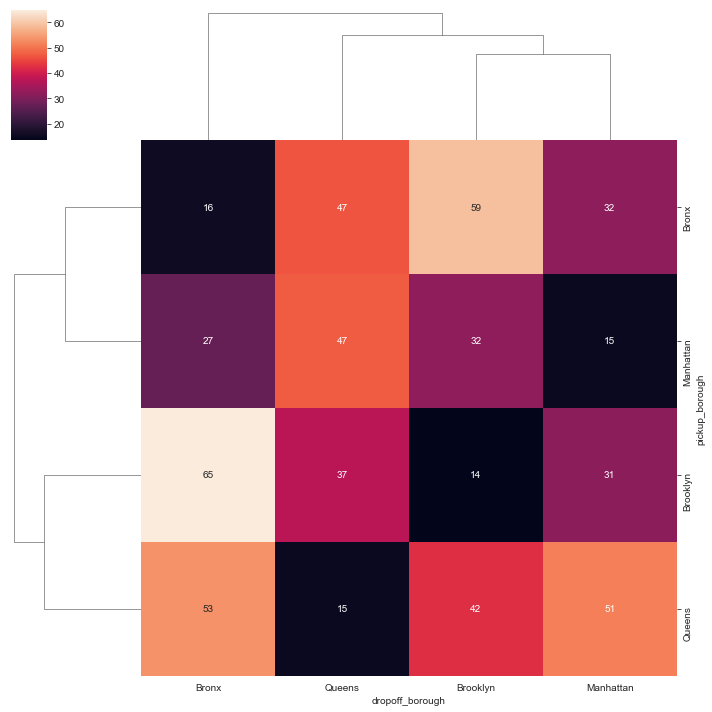

In [266]:
# Clutermap -> Correlation by value map

sns.clustermap(piv_tbl.drop('Staten Island',  axis=1), annot=True)

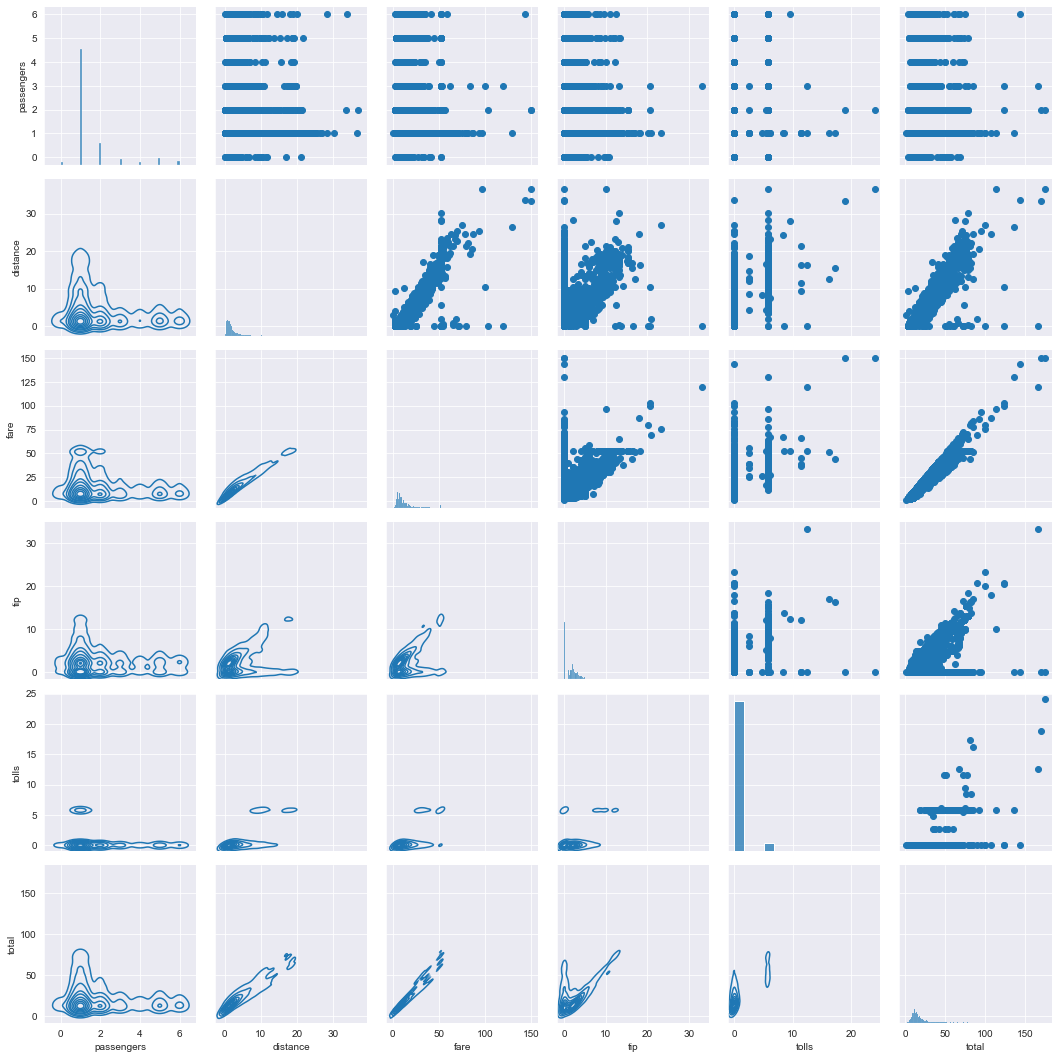

In [269]:
# Customizing the Pair Plot

g = sns.PairGrid(df)
# g.map(plt.scatter) # All plots will be scatter


g.map_diag(sns.histplot) # only diagonals will be histplot
g.map_upper(plt.scatter) # only the upper section will be scatter
g.map_lower(sns.kdeplot) # only the lower section will be kdeplots